<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Omicron_Tweet_Sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:#800080 ;"><strong>Exploratory Data Analysis</strong></h1>

<ul>
    <li><h4>Import libraries</h4></li>
</ul>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pycountry
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

<ul>
    <li><h4>Load data</h4></li>
</ul>

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/omicron.csv')

# first five rows
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1465689607165591552,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,2009-05-21 08:32:19,20759,2321,739,False,2021-11-30 14:30:08,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1465688203709464578,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,2013-12-31 02:57:32,17134,8,31,False,2021-11-30 14:24:33,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False


<ul>
    <li><h4>Concise summary of the data</h4></li>
</ul>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66168 entries, 0 to 66167
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                66168 non-null  int64 
 1   user_name         66168 non-null  object
 2   user_location     51380 non-null  object
 3   user_description  62338 non-null  object
 4   user_created      66168 non-null  object
 5   user_followers    66168 non-null  int64 
 6   user_friends      66168 non-null  int64 
 7   user_favourites   66168 non-null  int64 
 8   user_verified     66168 non-null  bool  
 9   date              66168 non-null  object
 10  text              66168 non-null  object
 11  hashtags          47798 non-null  object
 12  source            66168 non-null  object
 13  retweets          66168 non-null  int64 
 14  favorites         66168 non-null  int64 
 15  is_retweet        66168 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 7.2+ MB


<ul>
    <li><h4>Shape of the data</h4></li>
</ul>

In [ ]:
df.shape

(66168, 16)

<p style="font-size:115%">Dataset has <strong>66168</strong> rows and <strong>16</strong> columns.</p>

<ul>
    <li><h4>Text column</h4></li>
</ul>

In [ ]:
# first 15 tweets
df['text'][:10].tolist()

['@SkyNews "Told you I\'d be Back!" #OMICRON “Odium Medicum you Insensate Cretins I don’t mean to be Rude but you’re O… https://t.co/fMleEuF12t',
 'Someone told me this in October #Omicron https://t.co/Ne5AqrmQ6Y',
 'Glad to see the public schoolkids are wrapping up 2021 with no signs of permanent psychological damage 🤔\n#COVID… https://t.co/pkvlA7sOui',
 '#Automation systems have become increasingly complex and so have the efforts for testing communication, interlockin… https://t.co/DcDKe8oByL',
 '\U0001f7e2 If u think Omicron is a FUD, you LONG📈\n🔴 If u think Omicron is a threat, you SHORT📉\nJoin our quiz for a chance to… https://t.co/hKyzZbjw3k',
 '#Digitaldisruption and emerging technologies are here to stay in the private investment space. The question is, how… https://t.co/Mg5GR9gZLF',
 "More #Covid19UK disinformation doing the rounds - this time, it's an email that pretends to be from the NHS, claimi… https://t.co/0JiBZSVI9g",
 'Fatigue, head and body aches and occasional sore t

<p style="font-size:115%">Text needs to be preprocessed, which will be taken care later</p>

<ul>
    <li><h4>Tweets per hour</h4></li>
</ul>

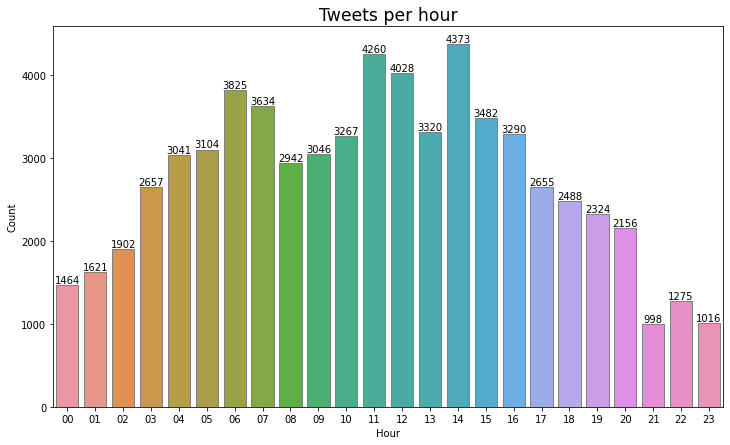

In [ ]:
# change to date time format
df['date']=pd.to_datetime(df['date'])

# tweets per hour
tweets_per_hr = df['date'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index

# plot
plt.figure(figsize=(12,7))
ax=sns.barplot(x='Hour', y='Count',data=tweets_per_hr, edgecolor='grey')
ax.bar_label(ax.containers[0])
plt.title('Tweets per hour', size='xx-large')
plt.show()

<ul>
    <li><h4>User locations</h4></li>
</ul>

In [ ]:
df['user_location'].value_counts()[:10]

Los Angeles, CA     3418
India               3130
New Delhi, India     992
London, England      677
Mumbai, India        640
London               519
United States        512
United Kingdom       504
Canada               503
New Delhi            481
Name: user_location, dtype: int64

<p style="font-size:115%">We will have to extract country names from the user location</p>

In [ ]:
# excluding null values (where location is not specified) in user_location 
location = [loc for loc in df['user_location'] if type(loc)==str]

# extracting country names from given location
country_name = [country.name for loc in location for country in pycountry.countries if country.name in loc]
country_name[:5]

['United Kingdom', 'Canada', 'Sri Lanka', 'India', 'Spain']

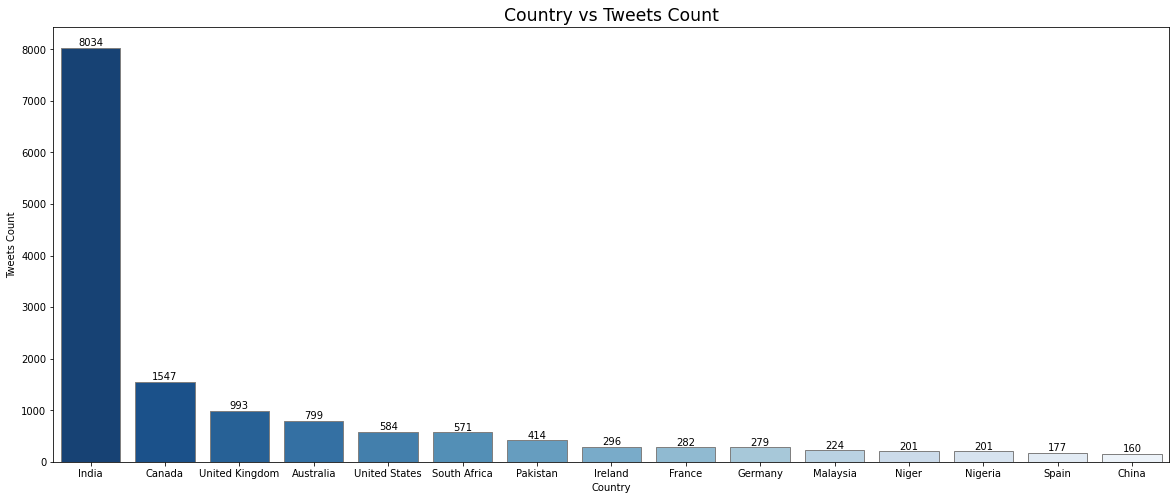

In [ ]:
# dictionary to count number of occurances of each country
count={}
for country in country_name:
    count[country] = count.get(country, 0) + 1

# Country vs tweets count
country_df = pd.DataFrame({'Country': list(count.keys()),'Tweets Count': list(count.values())})
country_df = country_df.sort_values(by = 'Tweets Count', ascending=False)
country_df=country_df[:15] # top 15 countries

# plot the data
plt.figure(figsize=(20,8))
plt.title('Country vs Tweets Count', size='xx-large')
ax = sns.barplot(x='Country', y='Tweets Count',data=country_df, palette='Blues_r', edgecolor='grey');
ax.bar_label(ax.containers[0])
plt.show()

<p style="font-size:115%">Most of the tweets are from <strong>India</strong></p>

<h1 style="color:#800080 ;"><strong>Text Preprocessing</strong></h1>

<p style="font-size:115%">Now, we clean then text using a user defined function.</p>

<ul>
    <li><h4>Basic text cleaning</h4></li>
</ul>

In [ ]:
# preprocess text
def preprocess(text):
    
    # remove new lines
    text = text.replace('\n', ' ')
    
    # remove links
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    
    # remove hashtags at the end of text
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',text)
    
    # remove handles
    text = re.sub('@[\w]+', '',text)
    
    # remove punctuations
    punc ='''.?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in text:
        if i in punc:
            text = text.replace(i, '') 
    
    # remove extra spaces
    re.sub("\s\s+", " ", text)
    
    # lower case
    text = text.strip().lower()
    
    # lemmatization
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    
    # stopword removal
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)

    
    # replace covid19 with covid
    text=text.replace('covid19','covid')
    
    return text

# remove promotional tweets (with words 'subscribe' and 'subscription')
def no_spam(text):
    if 'subscri' in text:
        text=''
    return text

In [ ]:
# apply functions
df['text']= df['text'].apply(preprocess)
df['text']= df['text'].apply(no_spam)

<ul>
    <li><h4>Emoji</h4></li>
</ul>

<p style="font-size:115%">In sentiment analysis use case, we need not remove the emojis or emoticons as it will convey some important information about the sentiment. Here we will remove all the non ascii characters except some common emojis</p>

In [ ]:
# function
def demoji(text):
    
    # frequent emojis whhich will be kept
    pattern = '😤|😡|😠|😑|🙄|🤨|😶|😱|🙀|😲|😓|😰|😢|😥|😭|😪|🤕|😔|😣|🙁|😒|😖|😕|🥴|🤒|☹️|😞|😷|🤧|😧|😨|😩|🥺|😦|😆|😀|🤭|🤩|😌|🥰|😁|😘|😂|😅|😊|😝|😙|😇'
    for word in text:    
        if re.match(pattern, word):
            continue
            
        # remove all other non ascii characters
        text=text.replace(word, re.sub('[^\x00-\x7f]','', word)).strip()
        
    return text

# apply function
df['text']= df['text'].apply(demoji)

<p style='font-size:115%'>Now we replace the emojis with their meaning</p>

In [ ]:
# funtion
def convert(text):
    
    # dictionary of emoji with their meaning
    d = {'😤':'frustrated','😡':'angry','😠':'angry','😱':'horrified','🙀':'shock','😲':'shock','🙄':'disapproval','🤨':'suspicion',
         '😶':'disappointment','😓':'sad','😰':'sad','😢':'sad','😥':'sad','😭':'sad','😪':'sad','🤕':'sad','😔':'sad','😣':'sad','🙁':'sad',
         '😒':'sad','😖':'sad','😕':'sad','🥴':'sad','🤒':'sad','☹️':'sad','😞':'sad','😷':'sick','🤧':'sick','😧':'sad','😨':'sad',
         '😩':'sad','🥺':'sad','😦':'sad','😫':'sad','😆':'happy','😀':'smile','🤭':'embarrassment','🤩':'exciting','🥰':'affection',
         '😁':'smile','😂':'laugh','😅':'nervousness','😊':'smile','😝':'fun','😙':'affection','😇':'blessed'}
    
    for emoji, sentiment in d.items():
        text=text.replace(emoji, sentiment)
    return text

# apply function
df['senti_text']= df['text'].apply(convert)

<ul>
    <li><h4>Word Cloud</h4></li>
</ul>

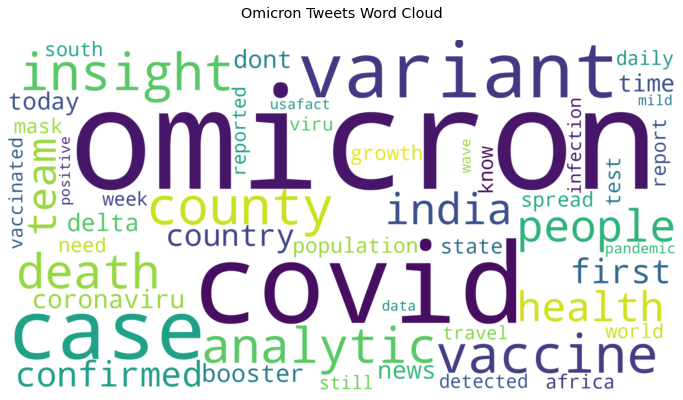

In [ ]:
# creating the text variable
text = " ".join(tweet for tweet in df.text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Tweets Word Cloud\n', size='x-large')
# plt.savefig('./omicron.jpg',dpi=720) # saving the image
plt.show()

<ul>
    <li><h4>Number of words in text</h4></li>
</ul>

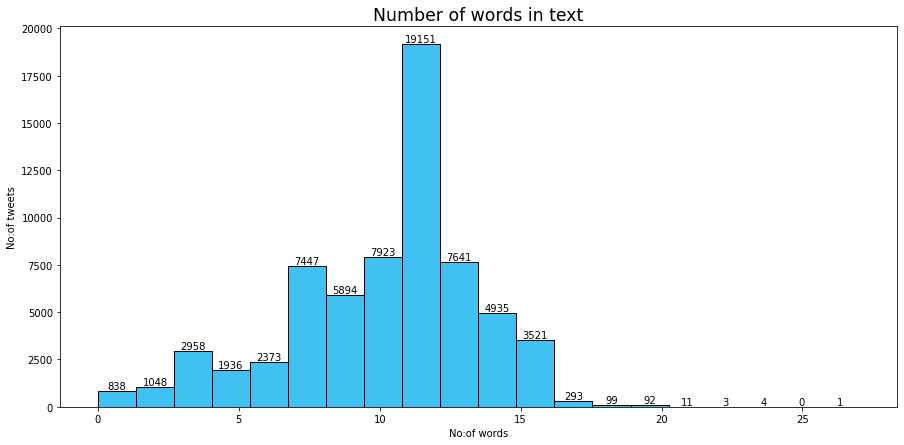

In [ ]:
# word count
word_count = [len(text.split()) for text in df.text]
df['word_count'] = word_count

# plot
plt.figure(figsize=(15,7))
ax=sns.histplot(x='word_count', data=df, bins=20, color='#00acee')
ax.bar_label(ax.containers[0])
plt.title('Number of words in text',size='xx-large')
plt.xlabel('No:of words')
plt.ylabel('No:of tweets')
plt.show()

<p style="font-size:115%">We will exclude some tweets</p>


In [ ]:
# excluding text with less than 3 words
df=df[df['word_count']>2]

# excluding tweets with more than 16 words
df=df[df['word_count']<17]

<h1 style="color:#800080;"><strong>Sentiment Analysis</strong></h1>

<p style="font-size:115%"><strong>Sentiment analysis</strong> is the computational task of automatically determining what feelings a writer is expressing in text. <strong>Sentiment</strong> is often framed as a binary distinction (positive vs. negative), but it can also be a more fine-grained, like identifying the specific emotion an author is expressing (like fear, joy or anger).</p>

<p style="font-size:115%">Sentiment analysis is used for many applications, especially in business intelligence. Some examples of applications for sentiment analysis include:
<ul>
    <li><p style="font-size:115%">Analyzing the social media discussion around a certain topic</p></li>
    <li><p style="font-size:115%">Evaluating survey responses</p></li>
    <li><p style="font-size:115%">Determining whether product reviews are positive or negative</p></li>
</ul>    
</p>
<p style="font-size:115%">Sentiment analysis is not perfect, and as with any automatic analysis of language, you will have errors in your results. It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze all of it.</p>

<ul>
    <li><h4>Overall Sentiment</h4></li>
</ul>

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

df["Positive"] = [SIA.polarity_scores(i)["pos"] for i in df["senti_text"]]
df["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in df["senti_text"]]
df["Negative"] = [SIA.polarity_scores(k)["neg"] for k in df["senti_text"]]
df1 = df[["text", "Positive","Neutral", "Negative"]]
df1.head()

,text,Positive,Neutral,Negative
0,told id back omicron odium medicum insensate c...,0.171,0.829,0.000
1,someone told october,0.000,1.000,0.000
2,glad see public schoolkids wrapping 2021 sign ...,0.197,0.592,0.211
3,automation system become increasingly complex ...,0.000,1.000,0.000
4,u think omicron fud long u think omicron thre...,0.213,0.508,0.279


In [ ]:
pos = sum(df1["Positive"])
neu = sum(df1["Neutral"])
neg = sum(df1["Negative"])

# calculates sentiment score
def sentiment_score(pos, neu, neg):
    if (pos>neu) and (pos>neg):
        print("Positive :)")
    elif (neu>pos) and (neu>neg):
        print("Neutral :|")
    else:
        print("Negative :(")
        
sentiment_score(pos, neu, neg)

Neutral :|


<p style="font-size:115%">So most of the opinions were <strong>neutral</strong>, which means that people were <strong>sharing information</strong> about the Omicron variant instead of sharing any positive or negative opinions.</p>

In [ ]:
# counting positive, neutral and negative tweets

sentiments_vader = []

for tweet in df.senti_text:
    sentiment_dict = SIA.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_vader.append(max(sentiment_dict , key=sentiment_dict.get))
    
df['sentiment_vader'] = sentiments_vader
df['sentiment_vader'].value_counts()

neu    60004
pos     2062
neg     1713
Name: sentiment_vader, dtype: int64

<ul>
    <li><h4>Word Cloud for Positive Tweets</h4></li>
</ul>

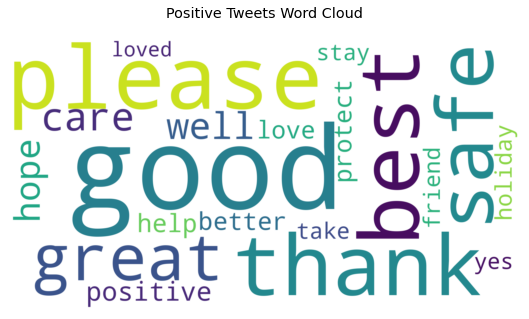

In [ ]:
pos_tweets = " ".join(sentiment for sentiment in df[df['sentiment_vader']=='pos']['text'])

# Creating word cloud of positive tweets
stopwords_p = STOPWORDS
stopwords_p.update(('omicron', 'covid', 'u', 'ha', 'amp','one','people','variant', 'mask'))
word_cloud1 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_p, #min_word_length=4,
                       width=2048, height=1080).generate(pos_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets Word Cloud\n', size='x-large')
plt.savefig('./positive.jpg',dpi=720)
plt.show()

<ul>
    <li><h4>Word Cloud for Negative Tweets</h4></li>
</ul>

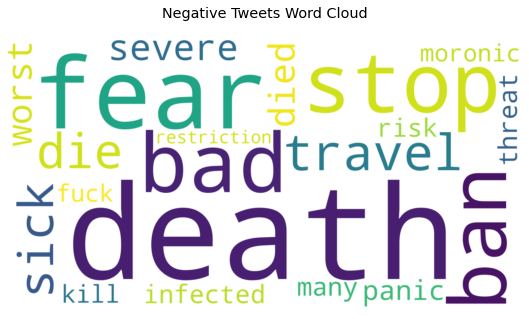

In [ ]:
neg_tweets = " ".join(sentiment for sentiment in df[df['sentiment_vader']=='neg']['text'])

# Creating word cloud of positive tweets
stopwords_n = STOPWORDS
stopwords_n.update(('vaccine','news','im','time','world')) # 
word_cloud2 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_n,
                       width=2048, height=1080).generate(neg_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets Word Cloud\n', size='x-large')
plt.show()

#### **Thank You**